In [152]:
import pandas as pd

data = pd.read_csv('data.csv')

In [153]:
data.head()

,treatment,video,song_rank,video_length,day_posted,time_posted,time_data_collected,views,likes,comments,favorites,shared,end_of_experiment_date_time,final_views,final_likes,final_comments,final_favorites,final_shared
0,C,Video #17,NaN,0:06:00,2/27/2024,4:00:00 PM,5:00:00 PM,597,13,0,0,0,3/4/2024 20:00,610,14,0,0,0
1,C,Video #18,NaN,0:07:00,2/27/2024,5:00:00 PM,6:00:00 PM,364,6,0,0,0,3/4/2024 20:00,585,11,0,0,0
2,T,Video #13,8.0,0:05:00,2/27/2024,7:00:00 PM,8:00:00 PM,2,0,0,0,0,3/4/2024 20:00,8,0,0,0,0
3,T,Video #6,3.0,0:06:00,2/27/2024,8:00:00 PM,9:00:00 PM,53,3,0,0,0,3/4/2024 20:00,551,25,0,0,0
4,T,Video #10,2.0,0:16:00,2/27/2024,9:00:00 PM,10:00:00 PM,366,25,0,0,0,3/4/2024 20:00,575,40,2,0,0


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   treatment                    60 non-null     object 
 1   video                        60 non-null     object 
 2   song_rank                    30 non-null     float64
 3   video_length                 60 non-null     object 
 4   day_posted                   60 non-null     object 
 5   time_posted                  60 non-null     object 
 6   time_data_collected          60 non-null     object 
 7   views                        60 non-null     int64  
 8   likes                        60 non-null     int64  
 9   comments                     60 non-null     int64  
 10  favorites                    60 non-null     int64  
 11  shared                       60 non-null     int64  
 12  end_of_experiment_date_time  60 non-null     object 
 13  final_views           

# Quick Data Cleansing

In [155]:
data['treatment'] = data['treatment'].apply(lambda x: 1 if x == 'T' else 0).astype(int)

data['video'] = (data['video'].apply(lambda x: x.split('#')[1])).astype(int)
data['day_posted'] = pd.to_datetime(data['day_posted'])
data['time_posted'] = pd.to_datetime(data['time_posted']).dt.hour
data['end_of_experiment_date_time'] = pd.to_datetime(data['end_of_experiment_date_time'])
data['end_of_experiment_date'] = data['end_of_experiment_date_time'].dt.date
data['end_of_experiment_date'] = pd.to_datetime(data['end_of_experiment_date_time'])
data['end_of_experiment_hour'] = data['end_of_experiment_date_time'].dt.hour
data['days_live'] = (data['end_of_experiment_date'] - data['day_posted']).apply(lambda x: str(x).split(' days')[0]).astype(int)

data = data.drop(columns=['song_rank', 'video_length', 'time_data_collected', 'end_of_experiment_date_time'])

/var/folders/x3/42y9jxy964lg3yyk_9zhss280000gn/T/ipykernel_30619/3558148109.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time_posted'] = pd.to_datetime(data['time_posted']).dt.hour


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   treatment               60 non-null     int64         
 1   video                   60 non-null     int64         
 2   day_posted              60 non-null     datetime64[ns]
 3   time_posted             60 non-null     int32         
 4   views                   60 non-null     int64         
 5   likes                   60 non-null     int64         
 6   comments                60 non-null     int64         
 7   favorites               60 non-null     int64         
 8   shared                  60 non-null     int64         
 9   final_views             60 non-null     int64         
 10  final_likes             60 non-null     int64         
 11  final_comments          60 non-null     int64         
 12  final_favorites         60 non-null     int64       

In [157]:
data

,treatment,video,day_posted,time_posted,views,likes,comments,favorites,shared,final_views,final_likes,final_comments,final_favorites,final_shared,end_of_experiment_date,end_of_experiment_hour,days_live
0,0,17,2024-02-27,16,597,13,0,0,0,610,14,0,0,0,2024-03-04 20:00:00,20,6
1,0,18,2024-02-27,17,364,6,0,0,0,585,11,0,0,0,2024-03-04 20:00:00,20,6
2,1,13,2024-02-27,19,2,0,0,0,0,8,0,0,0,0,2024-03-04 20:00:00,20,6
3,1,6,2024-02-27,20,53,3,0,0,0,551,25,0,0,0,2024-03-04 20:00:00,20,6
4,1,10,2024-02-27,21,366,25,0,0,0,575,40,2,0,0,2024-03-04 20:00:00,20,6
5,1,30,2024-02-28,8,259,4,0,0,0,602,16,0,0,0,2024-03-04 20:00:00,20,5
6,0,27,2024-02-28,9,0,0,0,0,0,7,0,0,0,0,2024-03-04 20:00:00,20,5
7,0,5,2024-02-28,10,0,0,0,0,0,3,0,0,0,0,2024-03-04 20:00:00,20,5
8,1,9,2024-02-28,11,0,0,0,0,0,6,0,0,0,0,2024-03-04 20:00:00,20,5
9,0,23,2024-02-28,12,0,0,0,0,0,5,0,0,0,0,2024-03-04 20:00:00,20,5


# Pre-experiment Randomization Check

In [158]:
# proportions_ztest function to check whether the randomization proportion was intended

from statsmodels.stats.proportion import proportions_ztest

treated = data['treatment'].sum()
n = len(data)

_, p_val = proportions_ztest(treated, n, value=.5)
print(f"The p-value for the proportions test is {p_val:.2} so we fail to reject the null hypothesis of proper randomization")

The p-value for the proportions test is 1.0 so we fail to reject the null hypothesis of proper randomization


# Regression Analysis

In [188]:
from pyfixest.estimation import feols
from pyfixest.utils import get_data
from pyfixest.summarize import etable

# Regression of treatment on views fixing for day and time posted
ols = feols('views ~ treatment', data=data).vcov('hetero')
multi_way_fe = feols('views ~ treatment | day_posted + time_posted + video', data=data).vcov('hetero')

etable([ols, multi_way_fe], type='md')

                         est1                est2
------------  ---------------  ------------------
depvar                  views               views
-------------------------------------------------
Intercept     32.933 (22.905)
treatment     -9.133 (27.194)  -65.375** (24.189)
-------------------------------------------------
video                       -                   x
day_posted                  -                   x
time_posted                 -                   x
-------------------------------------------------
R2                      0.002               0.912
S.E. type              hetero              hetero
Observations               60                  60
-------------------------------------------------
Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001
Format of coefficient cell:
Coefficient (Std. Error)


/var/folders/x3/42y9jxy964lg3yyk_9zhss280000gn/T/ipykernel_30619/1936449187.py:9: FutureWarning: 'pyfixest.summarize.etable' is deprecated and will be removed in a future version.
Please use 'pyfixest.etable' instead. You may refer the updated documentation at: https://s3alfisc.github.io/pyfixest/quickstart.html
  etable([ols, multi_way_fe], type='md')


In [186]:
ols_ci = [round(32.933 - (1.96 * 22.905), 4), round(32.933 + (1.96 * 22.905), 4)]
fe_ci = [round(-65.375 - (1.96 * 24.189), 4), round(-65.375 + (1.96 * 24.189), 4)]

te = -65.375 

print(f'95% Confidence Interval for OLS: {ols_ci}')
print(f'95% Confidence Interval for Multi-Way Fixed Effects: {fe_ci}')

95% Confidence Interval for OLS: [-11.9608, 77.8268]
95% Confidence Interval for Multi-Way Fixed Effects: [-112.7854, -17.9646]


# Statistical Power and Cohen's D

In [167]:
d = -65.375 / data['views'].std()

-0.625425719218575

In [168]:
from pingouin import power_ttest2n

power = power_ttest2n(nx=30, ny=30, d=d, alpha=0.05, alternative='two-sided')   # dataset is 60 obs with T & C equally split at 30

print(f"The power is {power:.4f}.")

The power is 0.6635.


# Visualizing Limitations

Text(0, 0.5, '')

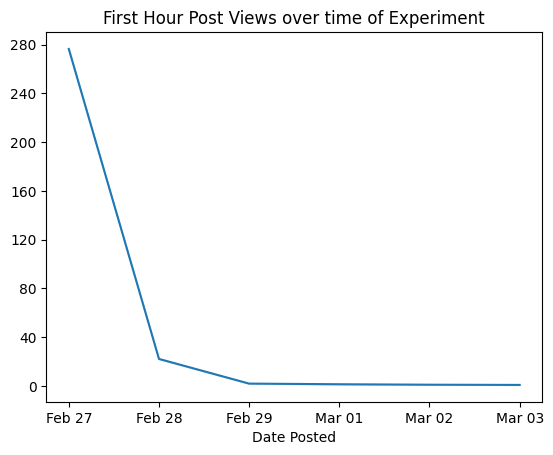

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

data['date_label'] = data['day_posted'].dt.strftime('%b %d')

sns.lineplot(data=data, x='date_label', y='views', errorbar=('ci', False))
plt.title('First Hour Post Views over time of Experiment')
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
plt.xlabel('Date Posted')
plt.ylabel('')